# Data Scarping

In this section we will gather most relevant review data from ```google_play_scraper``` for Dana app.
As this also Prepocessing step we use separated data for Slang Words. This slang word data originally from [Kamus Alay](https://huggingface.co/datasets/SEACrowd/kamus_alay). Because of library complication I need to perform data gathering in different ipynb [file](slang_word_data_gathering.ipynb)

# Libraries

In [1]:
from google_play_scraper import reviews_all, Sort
import numpy as np 
import pandas as pd
import csv
import requests
from io import StringIO
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# from wordcloud import WordCloud
import unicodedata as unicdata

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/dartoyo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dartoyo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Gathering

## Data Review

In [3]:
raw_review = reviews_all(app_id='id.dana',
                         lang='id',
                         country='id',
                         count=10000,
                         sort=Sort.MOST_RELEVANT)

In [5]:
review_df = pd.DataFrame(raw_review)
review_df.to_csv('raw_data.csv', index=False)

In [6]:
review_df = pd.read_csv('raw_data.csv')
review_df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a43400c5-ad3d-447e-b8d2-8d354a3362fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bisa ngga sih dana upgrade lagi, bila pembayar...",3,136,2.72.0,2025-02-01 13:26:52,NaN,NaN,2.72.0
1,d5856ad2-ee15-474a-a191-ff1c4b6dff46,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Payah...kenapa membuat cemas,membuat kecewa mi...",1,610,2.72.0,2025-01-19 06:59:34,"Hi Kak, makasih untuk feedback nya. Jika kamu ...",2023-09-15 17:59:08,2.72.0
2,223bf467-4c60-4f7f-a1f2-29da597e6b4b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya mau upgrade ke premium tapi selalu muncul...,1,77,2.73.0,2025-01-31 23:46:34,NaN,NaN,2.73.0
3,7da1d96f-bddf-4dee-afd1-d8f1e71499fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong untuk CS bot dan video tutor di update ...,1,55,2.73.0,2025-01-31 13:52:43,NaN,NaN,2.73.0
4,baf6749f-cdcb-4450-be10-627d39125536,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya termasuk pengguna setia apl dana. sehingg...,1,12,2.73.0,2025-02-05 23:34:18,NaN,NaN,2.73.0
5,10d368bd-03d7-4172-97ed-7edf29154edf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi aneh, saya lagi di proses memasukkan ...",1,193,2.72.0,2025-01-25 19:16:41,NaN,NaN,2.72.0
6,0ef3bdc0-cdb9-4f37-87c1-4decff33d717,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mau ngasih bintang - tapi ngak ada pilihannya....,1,4,2.73.0,2025-02-06 21:45:47,NaN,NaN,2.73.0
7,501cb819-9be1-46f3-aeca-bd6b0bc36b9d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Parah sih, bisa-bisanya saldo terpotong sendir...",1,5,2.73.0,2025-02-06 14:32:40,NaN,NaN,2.73.0
8,4ab48f7c-5edb-4452-8421-57640454bd25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Menurut ku ini aplikasi e-walet terbaik yg say...,5,2763,2.72.0,2025-01-13 19:36:08,NaN,NaN,2.72.0
9,609e0ace-80f8-487e-b78e-3c8b66e5a368,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya termasuk pemakai setia DANA,mulai awal pa...",4,23,2.73.0,2025-02-02 23:44:32,NaN,NaN,2.73.0


In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126000 entries, 0 to 125999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              126000 non-null  object        
 1   userName              126000 non-null  object        
 2   userImage             126000 non-null  object        
 3   content               126000 non-null  object        
 4   score                 126000 non-null  int64         
 5   thumbsUpCount         126000 non-null  int64         
 6   reviewCreatedVersion  105201 non-null  object        
 7   at                    126000 non-null  datetime64[ns]
 8   replyContent          95938 non-null   object        
 9   repliedAt             95938 non-null   datetime64[ns]
 10  appVersion            105201 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 10.6+ MB


## Data Slang word

Don't forget to tu run [slang_word_data_gathering.ipynb](slang_word_data_gathering.ipynb)

In [8]:
slang_word = pd.read_csv('indo_slangwords.csv')

In [9]:
slang_word.head()

,slang,formal,in_dictionary,context,categories
0,woww,wow,True,wow,['elongasi']
1,aminn,amin,True,Selamat ulang tahun kakak tulus semoga panjang...,['elongasi']
2,met,selamat,True,Met hari netaas kak!? Wish you all the best @t...,['abreviasi']
3,netaas,menetas,True,Met hari netaas kak!? Wish you all the best @t...,"['afiksasi', 'elongasi']"
4,keberpa,keberapa,False,Birthday yg keberpa kak?,['abreviasi']


# Data Cleaning

## Data Review

In [10]:
#Removing unecessary column
review_df = review_df.drop(columns=['reviewId','userName','userImage','score','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt','appVersion'])

In [11]:
review_df.head(5)

,content
0,"Bisa ngga sih dana upgrade lagi, bila pembayar..."
1,"Payah...kenapa membuat cemas,membuat kecewa mi..."
2,Saya mau upgrade ke premium tapi selalu muncul...
3,Tolong untuk CS bot dan video tutor di update ...
4,ini adalah aplikasi e-walet terbaik yg saya pu...


In [12]:
#Removing Duplicated rows
review_df.duplicated().sum()

1782

In [13]:
review_df.loc[review_df.duplicated()].head(10)

,content
10004,Tidak bisa upgrade ke premium
10545,sangat puas dengan pelayanannya
10708,mudah dan praktis
14672,Sangat membantu dalam bertransaksi
14899,cepat dalam bertransaksi
14931,sangat membantu untuk bertransaksi
16995,Sangat membantu dan mudah di gunakan
17453,Transaksi mudah dan cepat
17720,sangat membantu dan mudah di gunakan
17807,Sangat mudah dan cepat


In [14]:
review_df = review_df.drop_duplicates()

In [15]:
review_df.duplicated().sum()

0

In [16]:
#Data missing
review_df.isna().sum()

content    0
dtype: int64

In [17]:
#Saving the df to csv
review_df.to_csv('clean_dana_review.csv', index=False)

In [18]:
clean_df = pd.read_csv('clean_dana_review.csv')
clean_df.head(3)

,content
0,"Bisa ngga sih dana upgrade lagi, bila pembayar..."
1,"Payah...kenapa membuat cemas,membuat kecewa mi..."
2,Saya mau upgrade ke premium tapi selalu muncul...


In [19]:
clean_df['content'].duplicated().sum()

0

In [20]:
clean_df['content'].isna().sum()

0

## Data Slang

In [21]:
slang_word = slang_word.drop(columns=['in_dictionary','context','categories'])

In [22]:
slang_word.isna().sum()

slang     0
formal    0
dtype: int64

In [23]:
slang_word.duplicated().sum()

10596

In [24]:
slang_word.loc[slang_word.duplicated()].head(5)

,slang,formal
18,kk,kakak
25,yaa,ya
36,met,selamat
49,yg,yang
53,karna,karena


In [25]:
slang_word.loc[slang_word['slang'].str.match('kk')].head(5)

,slang,formal
16,kk,kakak
18,kk,kakak
395,kklau,kalau
594,kka,kakak
613,kk,kakak


In [26]:
slang_word = slang_word.drop_duplicates()

In [27]:
slang_word.duplicated().sum()

0

In [28]:
slang_word.to_csv('clean_slang.csv', index=False)

In [29]:
indo_slang_df = pd.read_csv('clean_slang.csv')
indo_slang_df.head(3)

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat


In [30]:
indo_slang_df.duplicated().sum()

0

In [31]:
indo_slang_dict = dict(zip(indo_slang_df["slang"], indo_slang_df["formal"]))
indo_slang_dict

{'woww': 'wow',
 'aminn': 'amin',
 'met': 'selamat',
 'netaas': 'menetas',
 'keberpa': 'keberapa',
 'eeeehhhh': 'eh',
 'kata2nyaaa': 'kata-katanya',
 'hallo': 'halo',
 'kaka': 'kakak',
 'ka': 'kak',
 'daah': 'deh',
 'aaaaahhhh': 'ah',
 'yaa': 'ya',
 'smga': 'semoga',
 'slalu': 'selalu',
 'amiin': 'amin',
 'kk': 'kakak',
 'trus': 'terus',
 'sii': 'sih',
 'nyenengin': 'menyenangkan',
 'bgt': 'banget',
 'gemess': 'gemas',
 'akuuu': 'aku',
 'jgn': 'jangan',
 'udah': 'sudah',
 'gitu': 'begitu',
 'aja': 'saja',
 'gemesiin': 'menggemaskan',
 'menyenangkn': 'menyenangkan',
 'rb': 'ribu',
 'akau': 'aku',
 'saranin': 'sarankan',
 'nemuin': 'menemukan',
 'yah': 'ya',
 'mnis2nya': 'manis-manisnya',
 'gtu': 'begitu',
 'tu': 'itu',
 'idolaa': 'idola',
 'bangett': 'banget',
 'kaakk': 'kak',
 'baaiikkk': 'baik',
 'telaatt': 'telat',
 'kaak': 'kak',
 'yg': 'yang',
 'lg': 'lagi',
 'skarang': 'sekarang',
 'sempet': 'sempat',
 'karna': 'karena',
 'ngga': 'enggak',
 'mantep': 'mantap',
 'loohhh': 'loh',
 '

In [32]:
indo_slang_dict.update({'pliss':'tolong', 
                        'plis':'tolong',
                        'plissss':'tolong',
                        'goblog':'goblok',
                        'dmi':'demi'
                        })

## Lexicon

In [33]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [34]:
lexicon_positive

{'hai': 3,
 'merekam': 2,
 'ekstensif': 3,
 'paripurna': 1,
 'detail': 2,
 'pernik': 3,
 'belas': 2,
 'welas': 4,
 'kabung': 1,
 'rahayu': 4,
 'maaf': 2,
 'hello': 2,
 'promo': 3,
 'terimakasih': 5,
 'cover': 3,
 'mohon': 2,
 'mengawal': 2,
 'statistik': 1,
 'keluangan': 3,
 'jalan terbuka': 3,
 'banyaknya': 3,
 'lebar': 3,
 'bentang': 1,
 'hendaknya': 1,
 'silahkan': 3,
 'semboyan': 2,
 'ditunggu': 2,
 'akses': 2,
 'penerangan': 2,
 'hi': 1,
 'dibantu': 2,
 'makasih': 4,
 'halo': 1,
 'thanks': 3,
 'pengembangan': 3,
 'diva': 2,
 'punya': 3,
 'tidak segan': 2,
 'detailnya': 1,
 'tak segan': 2,
 'aktivasi': 2,
 'asih': 3,
 'kasih sayang': 5,
 'kekaguman': 4,
 'kehangatan': 4,
 'afeksi': 2,
 'renjana': 2,
 'amor': 2,
 'cinta kasih': 5,
 'tresna': 2,
 'filantropi': 2,
 'cintrong': 2,
 'suasana (hati)': 1,
 'dinamika': 3,
 'tuhan': 3,
 'merespon': 3,
 'makmur': 4,
 'suka cita': 4,
 'pengguna': 1,
 'tunggu': 1,
 'lotre': 2,
 'nggak': 1,
 'kupon': 3,
 'terpelihara': 4,
 'terawat': 5,
 'tersa

In [35]:
lexicon_negative

{'putus tali gantung': -2,
 'gelebah': -2,
 'gobar hati': -2,
 'tersentuh (perasaan)': -1,
 'isak': -5,
 'larat hati': -3,
 'nelangsa': -3,
 'remuk redam': -5,
 'tidak segan': -2,
 'gemar': -1,
 'tak segan': -1,
 'sesal': -4,
 'pengen': -2,
 'penghayatan': -2,
 'absorpsi': -1,
 'linu': -4,
 'salah benang': -1,
 'sakit': -5,
 'lara': -5,
 'zuhud': -1,
 'mencederai': -4,
 'mengingkari': -4,
 'maaf': -3,
 'mengkhianat': -4,
 'mencelakai': -5,
 'mulu': -1,
 'ngga': -2,
 'borong': -1,
 'lever': -2,
 'kasian': -3,
 'gamau': -4,
 'doang': -1,
 'pulas': -1,
 'abis': -2,
 'coba': -1,
 'kangen': -3,
 'kalau': -1,
 'maunya': -1,
 'seandainya': -1,
 'marilah': -1,
 'bener': -1,
 'yaudah': -4,
 'nggak': -3,
 'gatau': -1,
 'apaan': -4,
 'ngakak': -2,
 'atuh': -1,
 'sekali': -1,
 'menarik hati': -1,
 'cedayam': -2,
 'kece': -3,
 'termakan': -1,
 'belom': -1,
 'malem': -1,
 'mencekau': -2,
 'menduga': -1,
 'menyuarakan': -1,
 'memprediksi': -1,
 'membunyikan': -1,
 'menerka': -1,
 'menaksir': -1,
 'me

# Data Preprocessing

## Case Folding Text

In [36]:
clean_df['case_folding'] = clean_df['content'].apply(lambda text: text.lower())

## Text Cleaning

In [37]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+|https\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r"wwww\S+", '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r"[²³¹]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = unicdata.normalize('NFKD', text)
    text = text.replace('\n', ' ')
    text = text.strip(' ')
    return text

In [38]:
# I found my dataset contain irregular font and its definitly have different unicode
text = "𝐒𝐚𝐧𝐠𝐚𝐭 𝐤𝐞𝐜𝐞𝐰𝐚 𝐝𝐞𝐧𝐠𝐚𝐧 𝐚𝐩𝐥𝐢𝐤𝐚𝐬𝐢 𝐝𝐚𝐧𝐚, 𝐤𝐞𝐧𝐚𝐩𝐚 𝐮𝐚𝐧𝐠 𝐬𝐚𝐲𝐚 𝐛𝐢𝐬𝐚 𝐡𝐢𝐥𝐚𝐧𝐠 , 𝐝𝐚𝐧 𝐬𝐮𝐝𝐚𝐡 𝐦𝐞𝐥𝐚𝐩𝐨𝐫 𝐤𝐞𝐩𝐢𝐡𝐚𝐤 𝐝𝐚𝐧𝐚 𝐭𝐚𝐩𝐢 𝐭𝐢𝐝𝐚𝐤 𝐚𝐝𝐚 𝐫𝐞𝐬𝐩𝐨𝐧 𝐝𝐚𝐫𝐢 𝐩𝐢𝐡𝐚𝐤 𝐝𝐚𝐧𝐚"
nrmlz_ = unicdata.normalize('NFKD', text)

print(nrmlz_)

Sangat kecewa dengan aplikasi dana, kenapa uang saya bisa hilang , dan sudah melapor kepihak dana tapi tidak ada respon dari pihak dana


In [39]:
clean_df['clean_text'] = clean_df['case_folding'].apply(cleaningText)

In [40]:
clean_df.head(2)

,content,case_folding,clean_text
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...


## Slang words normalization

In [41]:
def slang_normal(text):
    pattern = re.compile(r'\b('+'|'.join(re.escape(key) for key in indo_slang_dict.keys())+r')\b')
    return pattern.sub(lambda x:  indo_slang_dict[x.group()], text)

In [42]:
clean_df['normal_slang'] = clean_df['clean_text'].apply(slang_normal)

In [43]:
clean_df.head(3)

,content,case_folding,clean_text,normal_slang
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...,bisa enggak sih dana upgrade lagi bila pembaya...
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...,payah kenapa membuat cemas membuat kecewa mitr...
2,Saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...


## Removing Stop Words

In [44]:
sastra_stopword_factory = StopWordRemoverFactory()

In [45]:
indo_stop_words = set(stopwords.words('indonesian'))
eng_stop_words = set(stopwords.words('english'))
indo_stop_words.update(eng_stop_words)
indo_stop_words.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "kok"])
indo_stop_words.update(set(sastra_stopword_factory.get_stop_words()))

In [46]:
len(indo_stop_words)

966

In [47]:
def stop_word_filter(text):
    words = text.split()
    for word in words:
        if word in indo_stop_words:
            words.remove(word)
    return ' '.join(words)

In [48]:
clean_df['filtered_stop_word'] = clean_df['normal_slang'].apply(stop_word_filter)

In [49]:
clean_df.head(3)

,content,case_folding,clean_text,normal_slang,filtered_stop_word
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...,bisa enggak sih dana upgrade lagi bila pembaya...,enggak dana upgrade bila pembayaran otomatis l...
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...,payah kenapa membuat cemas membuat kecewa mitr...,payah cemas membuat kecewa mitramu aplikasi bi...
2,Saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,upgrade premium selalu muncul keterangan gagal...


## Text Tokenization

In [50]:
clean_df['tokenized_text'] = clean_df['filtered_stop_word'].apply(lambda text: word_tokenize(text))

In [51]:
clean_df.head(3)

,content,case_folding,clean_text,normal_slang,filtered_stop_word,tokenized_text
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...,bisa enggak sih dana upgrade lagi bila pembaya...,enggak dana upgrade bila pembayaran otomatis l...,"[enggak, dana, upgrade, bila, pembayaran, otom..."
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...,payah kenapa membuat cemas membuat kecewa mitr...,payah cemas membuat kecewa mitramu aplikasi bi...,"[payah, cemas, membuat, kecewa, mitramu, aplik..."
2,Saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,upgrade premium selalu muncul keterangan gagal...,"[upgrade, premium, selalu, muncul, keterangan,..."


## Stemming

In [52]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [53]:
def stemmingText(text, stemmer): 
    words = text
    stemmed_words = [stemmer.stem(word) for word in words] 
    return stemmed_words

In [54]:
test = {'a':[['makanan', 'berpergian', 'berenang', 'pengambilan'], ['makanan', 'berpergian', 'berenang', 'pengambilan', 'minuman', 'mainan']]}
test = pd.DataFrame(test)
test

,a
0,"[makanan, berpergian, berenang, pengambilan]"
1,"[makanan, berpergian, berenang, pengambilan, m..."


In [55]:
test['b'] = test['a'].apply(lambda text: stemmingText(text, stemmer))

test

,a,b
0,"[makanan, berpergian, berenang, pengambilan]","[makan, pergi, renang, ambil]"
1,"[makanan, berpergian, berenang, pengambilan, m...","[makan, pergi, renang, ambil, minum, main]"


In [56]:
clean_df['stemmed_word'] = clean_df['tokenized_text'].apply(lambda text: stemmingText(text, stemmer))

In [57]:
clean_df.head(3 )

,content,case_folding,clean_text,normal_slang,filtered_stop_word,tokenized_text,stemmed_word
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...,bisa enggak sih dana upgrade lagi bila pembaya...,enggak dana upgrade bila pembayaran otomatis l...,"[enggak, dana, upgrade, bila, pembayaran, otom...","[enggak, dana, upgrade, bila, bayar, otomatis,..."
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...,payah kenapa membuat cemas membuat kecewa mitr...,payah cemas membuat kecewa mitramu aplikasi bi...,"[payah, cemas, membuat, kecewa, mitramu, aplik...","[payah, cemas, buat, kecewa, mitra, aplikasi, ..."
2,Saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,upgrade premium selalu muncul keterangan gagal...,"[upgrade, premium, selalu, muncul, keterangan,...","[upgrade, premium, selalu, muncul, terang, gag..."


## Sentiment Lebel Using Lexicon

In [58]:
def sentiment_lebel(text):
    score = 0 
    polarity = ''

    for word in text:
        if word in lexicon_negative:
            score = score + lexicon_negative[word]
        if word in lexicon_positive:
            score = score + lexicon_positive[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    return score, polarity

In [59]:
sentiment_result = clean_df['stemmed_word'].apply(sentiment_lebel)
sentiment_result_list = list(zip(*sentiment_result))
sentiment_result_list

[(-4,
  -21,
  -3,
  -7,
  -46,
  -23,
  -46,
  -27,
  -10,
  -26,
  -6,
  -18,
  2,
  -19,
  -1,
  -12,
  -36,
  1,
  -37,
  -3,
  -8,
  -10,
  -16,
  -1,
  -29,
  -37,
  -15,
  5,
  19,
  -7,
  -28,
  -3,
  -2,
  -10,
  13,
  0,
  20,
  1,
  -6,
  1,
  -25,
  2,
  4,
  -12,
  15,
  -3,
  -25,
  0,
  -13,
  -20,
  3,
  20,
  -8,
  -4,
  -6,
  -1,
  -28,
  -4,
  16,
  8,
  -9,
  -43,
  -18,
  -9,
  22,
  -16,
  2,
  -12,
  -12,
  20,
  -1,
  15,
  -15,
  -7,
  -18,
  -3,
  -6,
  13,
  3,
  -1,
  -26,
  -4,
  -30,
  3,
  -11,
  -13,
  -28,
  -24,
  -22,
  -7,
  8,
  -16,
  -13,
  -19,
  -13,
  -53,
  -12,
  7,
  18,
  -34,
  -5,
  14,
  15,
  4,
  -17,
  1,
  -1,
  -16,
  -9,
  -38,
  -27,
  -41,
  -8,
  -3,
  9,
  -37,
  -12,
  -48,
  -10,
  -10,
  2,
  6,
  8,
  -10,
  -12,
  -22,
  -20,
  14,
  -12,
  -5,
  -12,
  5,
  -2,
  -8,
  -9,
  -10,
  -3,
  8,
  22,
  3,
  1,
  -30,
  -17,
  -22,
  7,
  -10,
  -43,
  -19,
  -11,
  -33,
  -20,
  2,
  -8,
  4,
  -11,
  -10,
  -6,
  -28,
  -7,


In [60]:
clean_df['polarity_score'] = sentiment_result_list[0]
clean_df['polarity'] = sentiment_result_list[1]

In [61]:
clean_df['polarity'].value_counts()

polarity
negative    69565
positive    48916
neutral      5737
Name: count, dtype: int64

In [62]:
clean_df.head(3)

,content,case_folding,clean_text,normal_slang,filtered_stop_word,tokenized_text,stemmed_word,polarity_score,polarity
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...,bisa enggak sih dana upgrade lagi bila pembaya...,enggak dana upgrade bila pembayaran otomatis l...,"[enggak, dana, upgrade, bila, pembayaran, otom...","[enggak, dana, upgrade, bila, bayar, otomatis,...",-4,negative
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...,payah kenapa membuat cemas membuat kecewa mitr...,payah cemas membuat kecewa mitramu aplikasi bi...,"[payah, cemas, membuat, kecewa, mitramu, aplik...","[payah, cemas, buat, kecewa, mitra, aplikasi, ...",-21,negative
2,Saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,upgrade premium selalu muncul keterangan gagal...,"[upgrade, premium, selalu, muncul, keterangan,...","[upgrade, premium, selalu, muncul, terang, gag...",-3,negative


## Word token to Sentences

In [63]:
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [64]:
clean_df['final_text'] = clean_df['stemmed_word'].apply(toSentence)

In [65]:
clean_df.head(3)

,content,case_folding,clean_text,normal_slang,filtered_stop_word,tokenized_text,stemmed_word,polarity_score,polarity,final_text
0,"Bisa ngga sih dana upgrade lagi, bila pembayar...","bisa ngga sih dana upgrade lagi, bila pembayar...",bisa ngga sih dana upgrade lagi bila pembayara...,bisa enggak sih dana upgrade lagi bila pembaya...,enggak dana upgrade bila pembayaran otomatis l...,"[enggak, dana, upgrade, bila, pembayaran, otom...","[enggak, dana, upgrade, bila, bayar, otomatis,...",-4,negative,enggak dana upgrade bila bayar otomatis langga...
1,"Payah...kenapa membuat cemas,membuat kecewa mi...","payah...kenapa membuat cemas,membuat kecewa mi...",payah kenapa membuat cemas membuat kecewa mitr...,payah kenapa membuat cemas membuat kecewa mitr...,payah cemas membuat kecewa mitramu aplikasi bi...,"[payah, cemas, membuat, kecewa, mitramu, aplik...","[payah, cemas, buat, kecewa, mitra, aplikasi, ...",-21,negative,payah cemas buat kecewa mitra aplikasi bisa bu...
2,Saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,saya mau upgrade ke premium tapi selalu muncul...,upgrade premium selalu muncul keterangan gagal...,"[upgrade, premium, selalu, muncul, keterangan,...","[upgrade, premium, selalu, muncul, terang, gag...",-3,negative,upgrade premium selalu muncul terang gagal tim...


<Axes: >

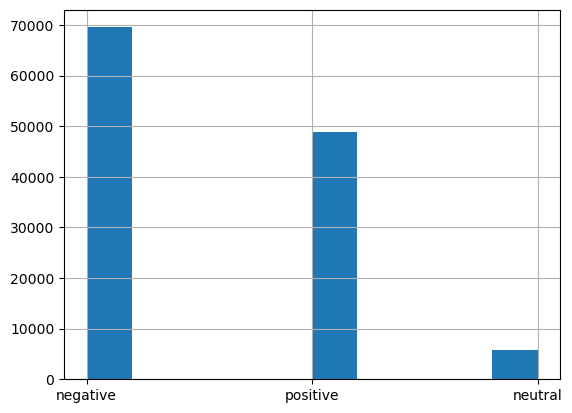

In [66]:
clean_df['polarity'].hist()

## Saving Final Data Frame

In [67]:
clean_df.to_csv('final_df.csv', index=False)